In [54]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

# Set visualization styles
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8")

# Import the analytics data
df = pd.read_csv('analytics.csv')

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
display(df.isna().sum())

# Display data types
print("\nData types:")
display(df.dtypes)

Dataset shape: (8689, 9)

First 5 rows:


,id,type,url,payload,user_id,session_id,received_at,created_at,domain
0,19500,from-directs,www.lessextension.com/,"""anticonsumption""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T01:06:50.771229+00:00,2025-03-27T01:06:50.072+00:00,lessextension.com
1,19501,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:08.182539+00:00,2025-03-27T04:40:08.386+00:00,lessextension.com
2,19502,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:12.087957+00:00,2025-03-27T04:40:11.03+00:00,lessextension.com
3,19503,from-directs,www.lessextension.com/,"""shoppingaddiction""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T06:05:28.66007+00:00,2025-03-27T06:05:28.463+00:00,lessextension.com
4,19504,from-directs,www.lessextension.com/,"""kua""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T07:16:26.763114+00:00,2025-03-27T07:16:25.837+00:00,lessextension.com



Missing values per column:


id               0
type             0
url              0
payload        896
user_id          0
session_id       0
received_at      0
created_at       0
domain           0
dtype: int64


Data types:


id              int64
type           object
url            object
payload        object
user_id        object
session_id     object
received_at    object
created_at     object
domain         object
dtype: object

In [55]:
# Display the first few rows of the dataframe with all columns to check structure
pd.set_option('display.max_columns', None)
display(df.head())

# Check for the 'enforce_wait_modal_shown' event in the data
if 'event_name' in df.columns:
    modal_events = df[df['event_name'].str.contains('modal', case=False, na=False)]['event_name'].unique()
    print("\nModal-related events in the dataset:")
    display(modal_events)
    
    # Count number of modal events
    print("\nCount of modal events:")
    display(df[df['event_name'].str.contains('modal', case=False, na=False)]['event_name'].value_counts())
else:
    print("No 'event_name' column found in the dataset")
    print("Available columns:", df.columns.tolist())

,id,type,url,payload,user_id,session_id,received_at,created_at,domain
0,19500,from-directs,www.lessextension.com/,"""anticonsumption""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T01:06:50.771229+00:00,2025-03-27T01:06:50.072+00:00,lessextension.com
1,19501,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:08.182539+00:00,2025-03-27T04:40:08.386+00:00,lessextension.com
2,19502,from-directs,www.lessextension.com/,"""chrome_extensions""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T04:40:12.087957+00:00,2025-03-27T04:40:11.03+00:00,lessextension.com
3,19503,from-directs,www.lessextension.com/,"""shoppingaddiction""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T06:05:28.66007+00:00,2025-03-27T06:05:28.463+00:00,lessextension.com
4,19504,from-directs,www.lessextension.com/,"""kua""",less-website,1994df91-38bf-459b-aa1c-14a59bb77df2,2025-03-27T07:16:26.763114+00:00,2025-03-27T07:16:25.837+00:00,lessextension.com


No 'event_name' column found in the dataset
Available columns: ['id', 'type', 'url', 'payload', 'user_id', 'session_id', 'received_at', 'created_at', 'domain']


In [56]:
# Check if modal events are in the 'type' column
print("\nType values containing 'modal':")
modal_types = df[df['type'].str.contains('modal', case=False, na=False)]['type'].unique()
display(modal_types)
if len(modal_types) > 0:
    print("\nCount of modal events by type:")
    display(df[df['type'].str.contains('modal', case=False, na=False)]['type'].value_counts())

# Check if modal events are in the 'payload' column
print("\nPayload values containing 'modal':")
modal_payloads = df[df['payload'].str.contains('modal', case=False, na=False)]['payload'].unique()
display(modal_payloads)
if len(modal_payloads) > 0:
    print("\nCount of modal events in payload:")
    display(df[df['payload'].str.contains('modal', case=False, na=False)]['payload'].value_counts())

# Check for 'enforce_wait' in any column
print("\nChecking for 'enforce_wait' in any column:")
for col in df.columns:
    if df[col].dtype == object:
        matches = df[df[col].str.contains('enforce_wait', case=False, na=False)]
        if len(matches) > 0:
            print(f"Found in '{col}' column:")
            display(matches[col].unique())


Type values containing 'modal':


array(['welcome-modal-seen', 'enforce_wait_modal_shown'], dtype=object)


Count of modal events by type:


type
welcome-modal-seen          17
enforce_wait_modal_shown    14
Name: count, dtype: int64


Payload values containing 'modal':


array([], dtype=object)


Checking for 'enforce_wait' in any column:
Found in 'type' column:


array(['enforce_wait_modal_shown', 'enforce_wait_info_expanded',
       'enforce_wait_canceled'], dtype=object)

In [57]:
# Filter for the enforce_wait_modal_shown events
modal_shown_events = df[df['type'] == 'enforce_wait_modal_shown']

# Get the list of user IDs who saw the modal
users_who_saw_modal = modal_shown_events['user_id'].unique()
print(f"Number of users who saw the modal: {len(users_who_saw_modal)}")

# Create a dataframe with events from users who saw the modal
users_events = df[df['user_id'].isin(users_who_saw_modal)]

# Convert timestamp to datetime for proper time calculations - with more flexible parsing
# Make all timestamps timezone-naive by converting to UTC and then removing timezone
users_events['timestamp'] = pd.to_datetime(users_events['created_at'], format='mixed', utc=True).dt.tz_localize(None)

# Sort by user_id and timestamp
users_events = users_events.sort_values(['user_id', 'timestamp'])

# Group by user and calculate time difference to the modal shown event
results = []

for user_id in users_who_saw_modal:
    user_data = users_events[users_events['user_id'] == user_id].copy()
    
    # Get the timestamp of when the modal was shown for this user
    modal_timestamps = user_data[user_data['type'] == 'enforce_wait_modal_shown']['timestamp'].values
    
    for modal_time in modal_timestamps:
        # For datetime subtraction, ensure we're working with datetimes in the same format
        time_diffs = [(t - modal_time).total_seconds() for t in user_data['timestamp']]
        user_data['time_to_modal'] = time_diffs
        
        # Get events that happened before the modal (negative time_to_modal)
        before_modal = user_data[user_data['time_to_modal'] < 0].copy()
        
        if not before_modal.empty:
            # Time from the first tracked event to modal shown
            first_event_to_modal = abs(before_modal['time_to_modal'].min())
            
            # Time from the previous event to modal shown
            prev_event_to_modal = abs(before_modal['time_to_modal'].max())
            
            results.append({
                'user_id': user_id,
                'session_id': user_data[user_data['type'] == 'enforce_wait_modal_shown']['session_id'].values[0],
                'modal_timestamp': modal_time,
                'first_event_to_modal_seconds': first_event_to_modal,
                'prev_event_to_modal_seconds': prev_event_to_modal,
                'num_events_before_modal': len(before_modal)
            })

# Create results dataframe
time_analysis_df = pd.DataFrame(results)

# Convert seconds to minutes for easier interpretation
time_analysis_df['first_event_to_modal_minutes'] = time_analysis_df['first_event_to_modal_seconds'] / 60
time_analysis_df['prev_event_to_modal_minutes'] = time_analysis_df['prev_event_to_modal_seconds'] / 60

# Display summary statistics
print("\nTime analysis results:")
display(time_analysis_df.head())

print("\nTime from first event to modal shown (in minutes):")
display(time_analysis_df['first_event_to_modal_minutes'].describe())

print("\nTime from previous event to modal shown (in minutes):")
display(time_analysis_df['prev_event_to_modal_minutes'].describe())

Number of users who saw the modal: 6

Time analysis results:


/var/folders/3t/zxm5y0q90jz8w3yfmlvzj8mh0000gn/T/ipykernel_56663/1795967436.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_events['timestamp'] = pd.to_datetime(users_events['created_at'], format='mixed', utc=True).dt.tz_localize(None)


,user_id,session_id,modal_timestamp,first_event_to_modal_seconds,prev_event_to_modal_seconds,num_events_before_modal,first_event_to_modal_minutes,prev_event_to_modal_minutes
0,7e54f2ee-060a-467e-b319-9e99d8e58e27,cb631236-7a98-4c37-b82c-83b625345dfe,2025-04-04 02:32:08.936,2497.627,3.775,224,41.627117,0.062917
1,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,2025-04-04 14:36:21.283,350024.377,2.224,51,5833.739617,0.037067
2,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,2025-04-04 14:36:26.122,350029.216,1.627,54,5833.820267,0.027117
3,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,2025-04-04 14:36:56.739,350059.833,2.519,63,5834.330550,0.041983
4,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,2025-04-04 15:46:56.154,354259.248,3.502,73,5904.320800,0.058367



Time from first event to modal shown (in minutes):


count       14.000000
mean      4235.726219
std       4519.517945
min          2.705150
25%         48.688487
50%       3998.198275
75%       5886.823238
max      11666.395650
Name: first_event_to_modal_minutes, dtype: float64


Time from previous event to modal shown (in minutes):


count    14.000000
mean      0.047245
std       0.050520
min       0.002150
25%       0.020267
50%       0.032942
75%       0.054887
max       0.207150
Name: prev_event_to_modal_minutes, dtype: float64

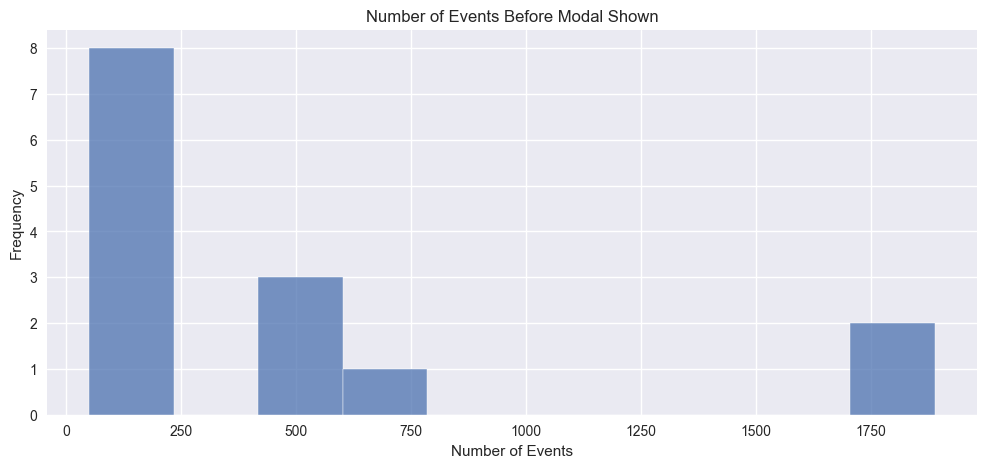

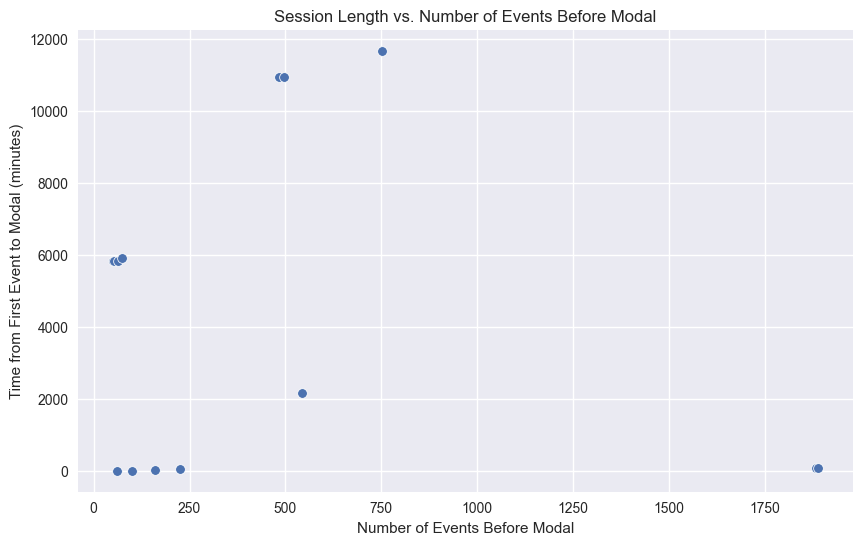


Correlation between variables:


,first_event_to_modal_minutes,prev_event_to_modal_minutes,num_events_before_modal
first_event_to_modal_minutes,1.000000,0.267090,-0.176967
prev_event_to_modal_minutes,0.267090,1.000000,-0.065096
num_events_before_modal,-0.176967,-0.065096,1.000000


In [58]:
# Create visualizations of the time distributions

# Number of events before modal
plt.figure(figsize=(12, 5))
sns.histplot(data=time_analysis_df, x='num_events_before_modal', bins=10)
plt.title('Number of Events Before Modal Shown')
plt.xlabel('Number of Events')
plt.ylabel('Frequency')
plt.show()

# User session analysis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=time_analysis_df, x='num_events_before_modal', y='first_event_to_modal_minutes')
plt.title('Session Length vs. Number of Events Before Modal')
plt.xlabel('Number of Events Before Modal')
plt.ylabel('Time from First Event to Modal (minutes)')
plt.show()

# Display correlation between measurements
print("\nCorrelation between variables:")
display(time_analysis_df[['first_event_to_modal_minutes', 'prev_event_to_modal_minutes', 'num_events_before_modal']].corr())

Number of users who saw the modal: 6

Time analysis results (same site only):


,user_id,session_id,domain,modal_timestamp,first_event_to_modal_seconds,prev_event_to_modal_seconds,num_events_before_modal,first_event_to_modal_minutes,prev_event_to_modal_minutes
0,7e54f2ee-060a-467e-b319-9e99d8e58e27,cb631236-7a98-4c37-b82c-83b625345dfe,apple.com,2025-04-04 02:32:08.936,2497.627,3.775,224,41.627117,0.062917
1,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 14:36:21.283,350024.377,2.224,26,5833.739617,0.037067
2,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 14:36:26.122,350029.216,1.627,29,5833.820267,0.027117
3,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 14:36:56.739,350059.833,2.519,38,5834.330550,0.041983
4,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 15:46:56.154,354259.248,3.502,48,5904.320800,0.058367



Time from first event to modal shown on same site (in minutes):


count      14.000000
mean     1692.603426
std      2729.812808
min         2.705150
25%         5.896779
50%        55.707867
75%      4392.789792
max      5904.320800
Name: first_event_to_modal_minutes, dtype: float64


Time from previous event to modal shown on same site (in minutes):


count    14.000000
mean      0.047245
std       0.050520
min       0.002150
25%       0.020267
50%       0.032942
75%       0.054887
max       0.207150
Name: prev_event_to_modal_minutes, dtype: float64

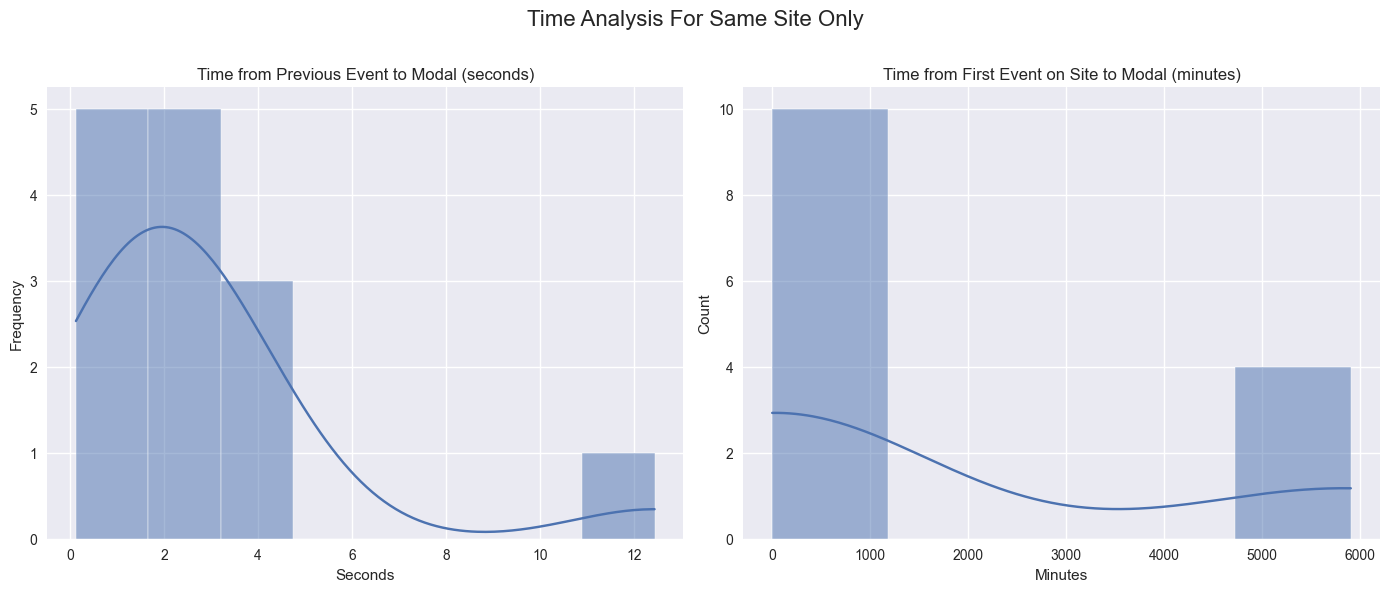


Comparison between all sites vs. same site analysis:


,metric,All sites,Same site only
0,Avg time from first event (min),4235.726219,1692.603426
1,Avg time from prev event (sec),2.834714,2.834714
2,Avg events before modal,488.142857,353.500000


In [59]:
# Analysis for time spent on the same site before modal view

# Filter for the enforce_wait_modal_shown events
modal_shown_events = df[df['type'] == 'enforce_wait_modal_shown']

# Get the list of user IDs who saw the modal
users_who_saw_modal = modal_shown_events['user_id'].unique()
print(f"Number of users who saw the modal: {len(users_who_saw_modal)}")

# Group by user and calculate time difference to the modal shown event
same_site_results = []

for _, modal_row in modal_shown_events.iterrows():
    user_id = modal_row['user_id']
    session_id = modal_row['session_id']
    domain = modal_row['domain']
    modal_time = pd.to_datetime(modal_row['created_at'], format='mixed', utc=True).dt.tz_localize(None) if hasattr(modal_row['created_at'], 'dt') else pd.to_datetime(modal_row['created_at'], format='mixed', utc=True).tz_localize(None)
    
    # Get all events from the same user, session, and domain before the modal
    user_site_events = df[
        (df['user_id'] == user_id) & 
        (df['domain'] == domain)
    ].copy()
    
    # Convert timestamps to datetime
    user_site_events['timestamp'] = pd.to_datetime(user_site_events['created_at'], format='mixed', utc=True).dt.tz_localize(None)
    
    # Filter for events before the modal
    before_modal = user_site_events[user_site_events['timestamp'] < modal_time].copy()
    
    if not before_modal.empty:
        # Time from the first tracked event on this site to modal shown
        first_event_to_modal = (modal_time - before_modal['timestamp'].min()).total_seconds()
        
        # Time from the previous event on this site to modal shown
        prev_event_to_modal = (modal_time - before_modal['timestamp'].max()).total_seconds()
        
        same_site_results.append({
            'user_id': user_id,
            'session_id': session_id,
            'domain': domain,
            'modal_timestamp': modal_time,
            'first_event_to_modal_seconds': first_event_to_modal,
            'prev_event_to_modal_seconds': prev_event_to_modal,
            'num_events_before_modal': len(before_modal)
        })

# Create results dataframe
same_site_df = pd.DataFrame(same_site_results)

# Convert seconds to minutes for easier interpretation
if not same_site_df.empty:
    same_site_df['first_event_to_modal_minutes'] = same_site_df['first_event_to_modal_seconds'] / 60
    same_site_df['prev_event_to_modal_minutes'] = same_site_df['prev_event_to_modal_seconds'] / 60

    # Display summary statistics
    print("\nTime analysis results (same site only):")
    display(same_site_df.head())

    print("\nTime from first event to modal shown on same site (in minutes):")
    display(same_site_df['first_event_to_modal_minutes'].describe())

    print("\nTime from previous event to modal shown on same site (in minutes):")
    display(same_site_df['prev_event_to_modal_minutes'].describe())
    
    # Create visualizations for same-site analysis
    plt.figure(figsize=(14, 6))
    plt.suptitle('Time Analysis For Same Site Only', fontsize=16)

    plt.subplot(1, 2, 1)
    sns.histplot(same_site_df['prev_event_to_modal_seconds'], kde=True)
    plt.title('Time from Previous Event to Modal (seconds)')
    plt.xlabel('Seconds')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.histplot(same_site_df['first_event_to_modal_minutes'], kde=True)
    plt.title('Time from First Event on Site to Modal (minutes)')
    plt.xlabel('Minutes')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()
    
    # Compare with overall analysis
    comparison_data = []
    
    if 'time_analysis_df' in locals():
        comparison_data.append({
            'metric': 'Avg time from first event (min)',
            'All sites': time_analysis_df['first_event_to_modal_minutes'].mean(),
            'Same site only': same_site_df['first_event_to_modal_minutes'].mean()
        })
        
        comparison_data.append({
            'metric': 'Avg time from prev event (sec)',
            'All sites': time_analysis_df['prev_event_to_modal_seconds'].mean(),
            'Same site only': same_site_df['prev_event_to_modal_seconds'].mean()
        })
        
        comparison_data.append({
            'metric': 'Avg events before modal',
            'All sites': time_analysis_df['num_events_before_modal'].mean(),
            'Same site only': same_site_df['num_events_before_modal'].mean()
        })
        
        # Create comparison dataframe
        comparison_df = pd.DataFrame(comparison_data)
        print("\nComparison between all sites vs. same site analysis:")
        display(comparison_df)
else:
    print("No events found on the same site before modal was shown.")


Number of sessions with modal shown: 7

Session analysis results:


,user_id,session_id,domain,modal_timestamp,first_event_to_modal_seconds,prev_event_to_modal_seconds,num_events_before_modal,distinct_domains,first_event_to_modal_minutes,prev_event_to_modal_minutes
0,7e54f2ee-060a-467e-b319-9e99d8e58e27,cb631236-7a98-4c37-b82c-83b625345dfe,apple.com,2025-04-04 02:32:08.936,2497.627,3.775,224,1,41.627117,0.062917
1,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 14:36:21.283,7.037,2.224,3,1,0.117283,0.037067
2,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 14:36:26.122,11.876,1.627,6,1,0.197933,0.027117
3,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 14:36:56.739,42.493,2.519,15,1,0.708217,0.041983
4,a8813899-eb7b-49f9-9e97-7f91f995e944,9712708c-13de-46ce-91f9-14c1b5721b49,shop.app,2025-04-04 15:46:56.154,4241.908,3.502,25,1,70.698467,0.058367



Time from first session event to modal shown (in minutes):


count    14.000000
mean     27.979365
std      32.453348
min       0.117283
25%       3.259600
50%      10.011975
75%      62.811229
max      86.531200
Name: first_event_to_modal_minutes, dtype: float64


Time from previous session event to modal shown (in minutes):


count    14.000000
mean      0.047245
std       0.050520
min       0.002150
25%       0.020267
50%       0.032942
75%       0.054887
max       0.207150
Name: prev_event_to_modal_minutes, dtype: float64


Number of distinct domains visited in session before modal:


count    14.000000
mean      1.285714
std       0.468807
min       1.000000
25%       1.000000
50%       1.000000
75%       1.750000
max       2.000000
Name: distinct_domains, dtype: float64

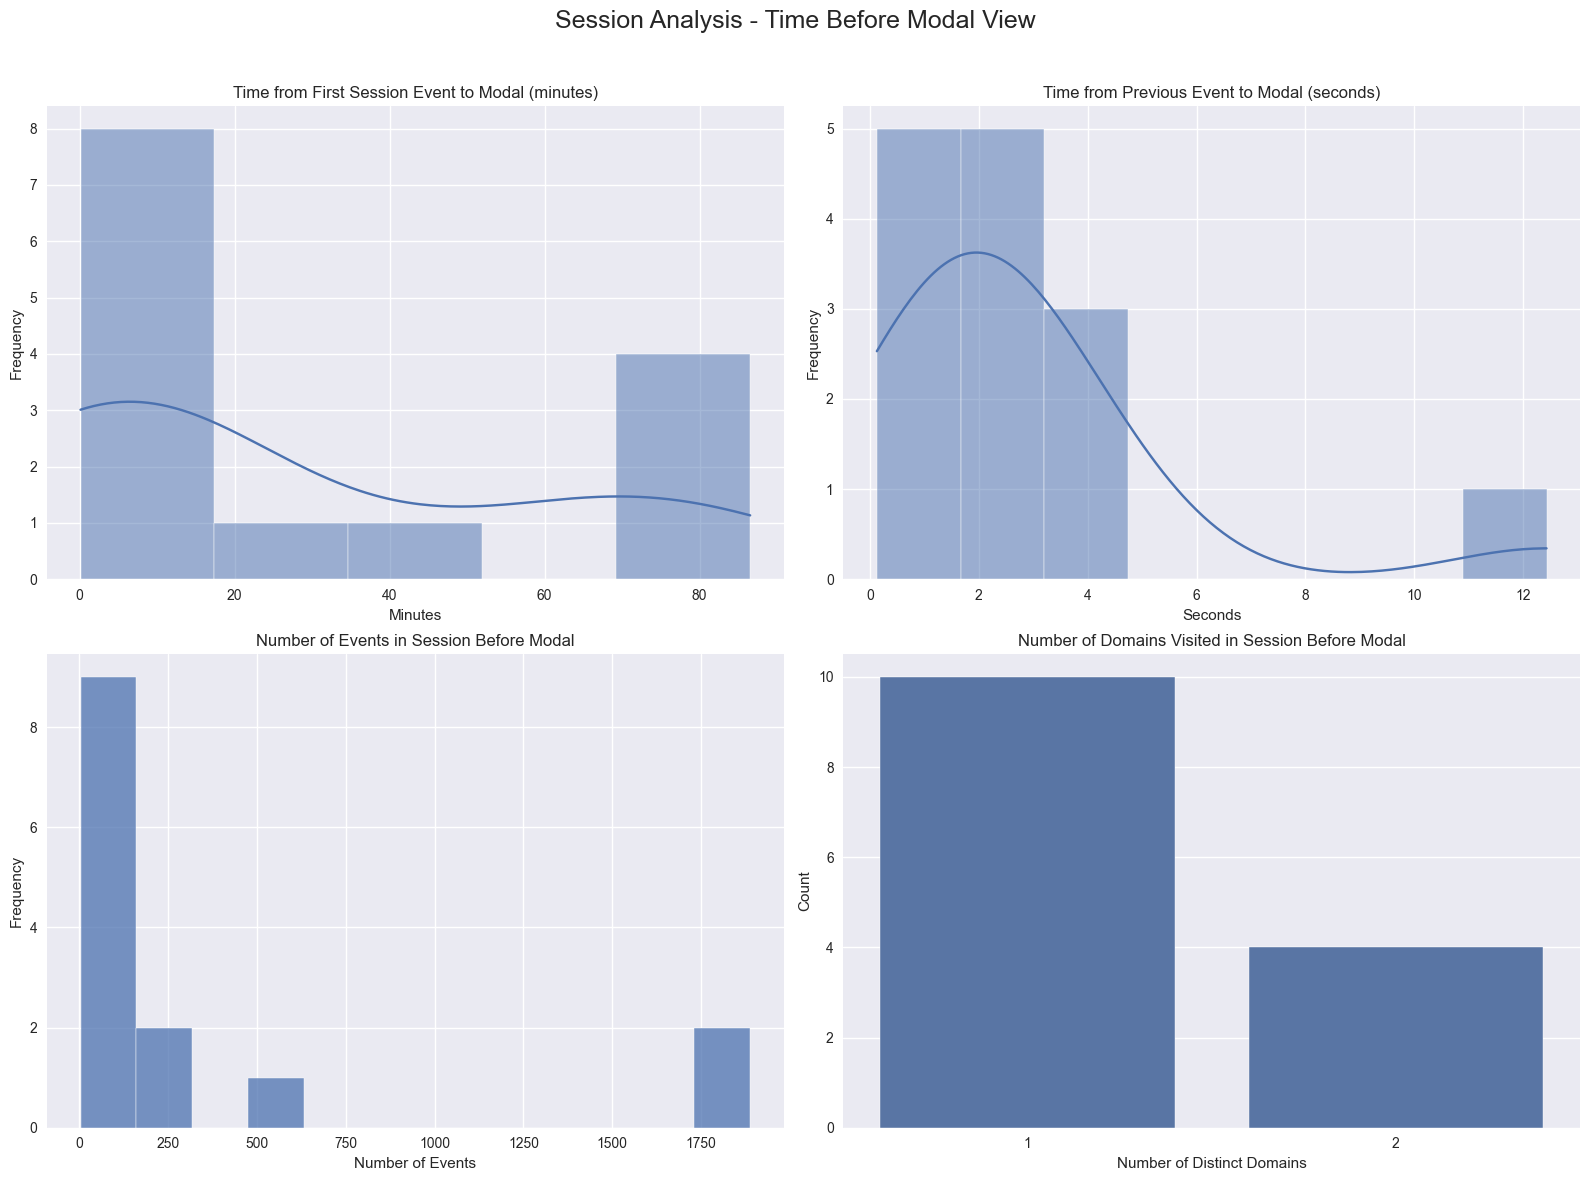


Comparison between different scopes of analysis:


,metric,All sites,Same site only,Same session only
0,Avg time from first event (min),4235.726219,1692.603426,27.979365
1,Avg time from prev event (sec),2.834714,2.834714,2.834714
2,Avg events before modal,488.142857,353.500000,372.785714


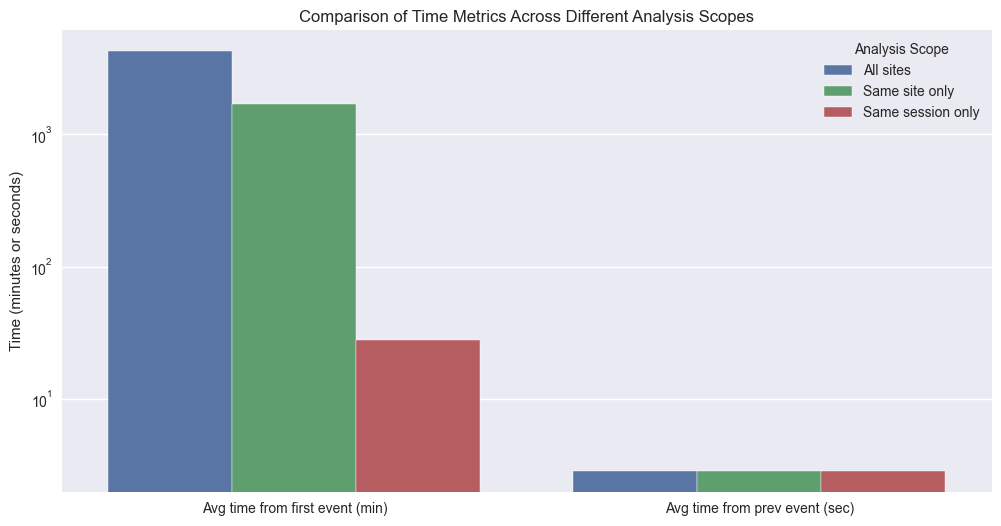

In [60]:
# Analysis for time spent in the same session before modal view

# Filter for the enforce_wait_modal_shown events
modal_shown_events = df[df['type'] == 'enforce_wait_modal_shown']

# Get the list of session IDs with modal views
sessions_with_modal = modal_shown_events['session_id'].unique()
print(f"Number of sessions with modal shown: {len(sessions_with_modal)}")

# Group by session and calculate time difference to the modal shown event
same_session_results = []

for _, modal_row in modal_shown_events.iterrows():
    user_id = modal_row['user_id']
    session_id = modal_row['session_id']
    domain = modal_row['domain']
    modal_time = pd.to_datetime(modal_row['created_at'], format='mixed', utc=True).dt.tz_localize(None) if hasattr(modal_row['created_at'], 'dt') else pd.to_datetime(modal_row['created_at'], format='mixed', utc=True).tz_localize(None)
    
    # Get all events from the same session before the modal
    session_events = df[(df['session_id'] == session_id)].copy()
    
    # Convert timestamps to datetime
    session_events['timestamp'] = pd.to_datetime(session_events['created_at'], format='mixed', utc=True).dt.tz_localize(None)
    
    # Filter for events before the modal
    before_modal = session_events[session_events['timestamp'] < modal_time].copy()
    
    if not before_modal.empty:
        # Time from the first event in this session to modal shown
        first_event_to_modal = (modal_time - before_modal['timestamp'].min()).total_seconds()
        
        # Time from the previous event in this session to modal shown
        prev_event_to_modal = (modal_time - before_modal['timestamp'].max()).total_seconds()
        
        # Number of distinct domains visited in this session before the modal
        distinct_domains = before_modal['domain'].nunique()
        
        same_session_results.append({
            'user_id': user_id,
            'session_id': session_id,
            'domain': domain,  # Domain where modal was shown
            'modal_timestamp': modal_time,
            'first_event_to_modal_seconds': first_event_to_modal,
            'prev_event_to_modal_seconds': prev_event_to_modal,
            'num_events_before_modal': len(before_modal),
            'distinct_domains': distinct_domains
        })

# Create results dataframe
session_analysis_df = pd.DataFrame(same_session_results)

# Convert seconds to minutes for easier interpretation
if not session_analysis_df.empty:
    session_analysis_df['first_event_to_modal_minutes'] = session_analysis_df['first_event_to_modal_seconds'] / 60
    session_analysis_df['prev_event_to_modal_minutes'] = session_analysis_df['prev_event_to_modal_seconds'] / 60

    # Display summary statistics
    print("\nSession analysis results:")
    display(session_analysis_df.head())

    print("\nTime from first session event to modal shown (in minutes):")
    display(session_analysis_df['first_event_to_modal_minutes'].describe())

    print("\nTime from previous session event to modal shown (in minutes):")
    display(session_analysis_df['prev_event_to_modal_minutes'].describe())
    
    print("\nNumber of distinct domains visited in session before modal:")
    display(session_analysis_df['distinct_domains'].describe())
    
    # Create visualizations for session analysis
    plt.figure(figsize=(16, 12))
    plt.suptitle('Session Analysis - Time Before Modal View', fontsize=18)
    
    # First event to modal time
    plt.subplot(2, 2, 1)
    sns.histplot(session_analysis_df['first_event_to_modal_minutes'], kde=True)
    plt.title('Time from First Session Event to Modal (minutes)')
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')
    
    # Previous event to modal time
    plt.subplot(2, 2, 2)
    sns.histplot(session_analysis_df['prev_event_to_modal_seconds'], kde=True)
    plt.title('Time from Previous Event to Modal (seconds)')
    plt.xlabel('Seconds')
    plt.ylabel('Frequency')
    
    # Number of events before modal
    plt.subplot(2, 2, 3)
    sns.histplot(data=session_analysis_df, x='num_events_before_modal')
    plt.title('Number of Events in Session Before Modal')
    plt.xlabel('Number of Events')
    plt.ylabel('Frequency')
    
    # Number of domains visited before modal
    plt.subplot(2, 2, 4)
    sns.countplot(data=session_analysis_df, x='distinct_domains')
    plt.title('Number of Domains Visited in Session Before Modal')
    plt.xlabel('Number of Distinct Domains')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
    # Compare with site-only and all events analyses
    comparison_data = []
    
    if 'time_analysis_df' in locals() and 'same_site_df' in locals():
        comparison_data.append({
            'metric': 'Avg time from first event (min)',
            'All sites': time_analysis_df['first_event_to_modal_minutes'].mean(),
            'Same site only': same_site_df['first_event_to_modal_minutes'].mean(),
            'Same session only': session_analysis_df['first_event_to_modal_minutes'].mean()
        })
        
        comparison_data.append({
            'metric': 'Avg time from prev event (sec)',
            'All sites': time_analysis_df['prev_event_to_modal_seconds'].mean(),
            'Same site only': same_site_df['prev_event_to_modal_seconds'].mean(),
            'Same session only': session_analysis_df['prev_event_to_modal_seconds'].mean()
        })
        
        comparison_data.append({
            'metric': 'Avg events before modal',
            'All sites': time_analysis_df['num_events_before_modal'].mean(),
            'Same site only': same_site_df['num_events_before_modal'].mean(),
            'Same session only': session_analysis_df['num_events_before_modal'].mean()
        })
        
        # Create comparison dataframe
        comparison_df = pd.DataFrame(comparison_data)
        print("\nComparison between different scopes of analysis:")
        display(comparison_df)
        
        # Create a visualization of the comparison
        plt.figure(figsize=(12, 6))
        
        # Convert to long format for seaborn
        comparison_long = pd.melt(comparison_df, 
                                id_vars=['metric'],
                                value_vars=['All sites', 'Same site only', 'Same session only'],
                                var_name='Analysis Scope', 
                                value_name='Value')
        
        # Plot only the first two metrics (time is more comparable)
        time_comparison = comparison_long[comparison_long['metric'].isin(['Avg time from first event (min)', 'Avg time from prev event (sec)'])]
        
        sns.barplot(data=time_comparison, x='metric', y='Value', hue='Analysis Scope')
        plt.title('Comparison of Time Metrics Across Different Analysis Scopes')
        plt.ylabel('Time (minutes or seconds)')
        plt.xlabel('')
        plt.yscale('log')  # Use log scale due to large differences
        plt.legend(title='Analysis Scope')
        plt.show()
else:
    print("No events found in the session before modal was shown.")
